<h1><center>Student Retention Analysis</h1>
<h2><center>Kait Kowalick, 2024</h2>

<h2>Libraries</h2>

In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [59]:
student_df = pd.read_csv("Student Retention.csv")
pd.set_option('display.max_columns', None)
student_df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,10,1,0,0,1,1,0,20,0,0,0,0,0,0.000000,0,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,4,1,0,0,0,1,0,19,0,0,6,6,6,14.000000,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,10,1,0,0,0,1,0,19,0,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,4,1,0,0,1,0,0,20,0,0,6,8,6,13.428571,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,10,0,0,0,1,0,0,45,0,0,6,9,5,12.333333,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


<h2>1. Data Cleansing</h2>

1. Determining Null fields. All fields are non-null. 

In [7]:
student_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 35 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Nacionality                                     4424 non-null   int64  
 7   Mother's qualification                          4424 non-null   int64  
 8   Father's qualification                          4424 non-null   int64  
 9   Mother's occupation                      

2. Adding categorical values back to data

In [12]:
student_df = pd.read_csv("Student Retention.csv")

#Marital Status
student_df['Marital status'].astype(int)
marital_dict = { 1: 'single', 2: 'married', 3: 'widower', 4: 'divorced', 5: 'facto union', 6: 'legally separated' }
student_df['Marital'] = student_df['Marital status'].map(marital_dict) 

#Course - unable d/t poor info from original dataset 
#Previous qualification

prev_qual_dict = {1 : 'Secondary education', 2:"Higher education - bachelor's degree", 3: 'Higher education - degree', 
                  4: "Higher education - Master's", 5: 'Higher education - Doctorate', 6 : 'Frequency of higher education', 
                  9 : '12th year of schooling - not completed', 10: '11th year of schooling - not completed', 
                  12 : 'Other - 11th year of schooling', 14: '10th year of schooling', 15: '10th year of schooling - not completed', 
                  19: 'Basic education 3rd cycle (9th/10th/11th year) or equiv.', 38 : 'Basic education 2nd cycle (6th/7th/8th year) or equiv.', 
                  39 : 'Technological specialization course', 40 : 'Higher education - degree (1st cycle)', 
                  42: 'Professional higher technical course', 43 : 'Higher education - master (2nd cycle)'}

student_df['Previous Qual'] = student_df['Previous qualification'].map(prev_qual_dict)
#Nationality (and change column name)

student_df.rename(columns = {'Nacionality':'Nationality'}, inplace = True)
nat_dict = {1 : 'Portuguese', 2 : 'German', 6 : 'Spanish', 11: 'Italian', 13 :'Dutch', 14: 'English',
            17: 'Lithuanian', 21: 'Angolan', 22 : 'Cape Verdean', 24: 'Guinean', 25: 'Mozambican', 26: 'Santomean', 
            32 : 'Turkish', 41 : 'Brazilian', 62 : 'Romanian', 100 : 'Moldova (Republic of)', 101 : 'Mexican', 
            103 : 'Ukrainian', 105 : 'Russian', 108 : 'Cuban', 109: 'Colombian'}
student_df['Nationality '] = student_df['Nationality'].map(nat_dict)
#Mother and Father qualification 
qual_dict = {1 : 'Secondary Education - 12th Year of Schooling or Eq.', 2 : "Higher Education - Bachelor's Degree", 
                3 : 'Higher Education - Degree', 4 : "Higher Education - Master's", 5 : 'Higher Education - Doctorate', 
                6 : 'Frequency of Higher Education', 9 : '12th Year of Schooling - Not Completed', 13 : '2nd year complementary high school course', 
                10 : '11th Year of Schooling - Not Completed', 11 : '7th Year (Old)', 12 : 'Other - 11th Year of Schooling',
                14 : '10th Year of Schooling', 18: 'General commerce course', 19: 'Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv.',
                20 : 'Complementary High School Course', 25 : 'Complementary High School Course - not concluded', 33 : 'Supplementary Accounting and Administration',
                22 : 'Technical-professional course', 26 : '7th year of schooling', 27 : '2nd cycle of the general high school course',
                29 : '9th Year of Schooling - Not Completed', 30 : '8th year of schooling', 34 : 'Unknown', 35 : "Can't read or write",
                36 : 'Can read without having a 4th year of schooling', 37 : 'Basic education 1st cycle (4th/5th year) or equiv.', 
                38 : 'Basic Education 2nd Cycle (6th/7th/8th Year) or Equiv.', 39 : 'Technological specialization course', 
                40 : 'Higher education - degree (1st cycle)', 41 : 'Specialized higher studies course', 42 : 'Professional higher technical course',
                43 : 'Higher Education - Master (2nd cycle)', 44 : 'Higher Education - Doctorate (3rd cycle)'}
student_df["Mother's Qual"] = student_df["Mother's qualification"].map(qual_dict)
student_df["Father's Qual"] = student_df["Father's qualification"].map(qual_dict)
#Mother occupation and Father occupation
occup_dict = {
    0: 'Student',
    1: 'Representatives of the Legislative Power and Executive Bodies, Directors, Directors and Executive Managers',
    2: 'Specialists in Intellectual and Scientific Activities',
    3: 'Intermediate Level Technicians and Professions',
    4: 'Administrative staff',
    5: 'Personal Services, Security and Safety Workers and Sellers',
    6: 'Farmers and Skilled Workers in Agriculture, Fisheries and Forestry',
    7: 'Skilled Workers in Industry, Construction and Craftsmen',
    8: 'Installation and Machine Operators and Assembly Workers',
    9: 'Unskilled Workers',
    10: 'Armed Forces Professions',
    90: 'Other Situation',
    99: '(blank)',
    101: 'Armed Forces Officers',
    102: 'Armed Forces Sergeants',
    103: 'Other Armed Forces personnel',
    112: 'Directors of administrative and commercial services',
    114: 'Hotel, catering, trade and other services directors',
    121: 'Specialists in the physical sciences, mathematics, engineering and related techniques',
    122: 'Health professionals',
    123: 'Teachers',
    124: 'Specialists in finance, accounting, administrative organization, public and commercial relations',
    131: 'Intermediate level science and engineering technicians and professions',
    132: 'Technicians and professionals, of intermediate level of health',
    134: 'Intermediate level technicians from legal, social, sports, cultural and similar services',
    135: 'Information and communication technology technicians',
    141: 'Office workers, secretaries in general and data processing operators',
    143: 'Data, accounting, statistical, financial services and registry-related operators',
    144: 'Other administrative support staff',
    151: 'Personal service workers',
    152: 'Sellers',
    153: 'Personal care workers and the like',
    154: 'Protection and security services personnel',
    161: 'Market-oriented farmers and skilled agricultural and animal production workers',
    163: 'Farmers, livestock keepers, fishermen, hunters and gatherers, subsistence',
    171: 'Skilled construction workers and the like, except electricians',
    172: 'Skilled workers in metallurgy, metalworking and similar',
    174: 'Skilled workers in electricity and electronics',
    175: 'Workers in food processing, woodworking, clothing and other industries and crafts',
    181: 'Fixed plant and machine operators',
    182: 'Assembly workers',
    183: 'Vehicle drivers and mobile equipment operators',
    192: 'Unskilled workers in agriculture, animal production, fisheries and forestry',
    193: 'Unskilled workers in extractive industry, construction, manufacturing and transport',
    194: 'Meal preparation assistants',
    195: 'Street vendors (except food) and street service providers'
}
student_df["Mother's Occup"] = student_df["Mother's occupation"].map(occup_dict)
student_df["Father's Occup"] = student_df["Father's occupation"].map(occup_dict)

#Change column name: Grades
student_df.rename(columns = {'Curricular units 1st sem (grade)':'First Semester Grade'}, inplace = True)
student_df.rename(columns = {'Curricular units 2nd sem (grade)':'Second Semester Grade'}, inplace = True)

#Gender
def gender(x):
    return 'Male' if x == 1 else 'Female'

student_df['Gender '] = student_df['Gender'].apply(gender)

#Target 
def target(x):
    if x == 'Dropout': return True
    elif x == 'Graduate': return False
    else: return pd.NA
student_df['Dropout'] = student_df['Target'].apply(target)

def update_df(student_df, Dropout):
    student_df.dropna(subset = ['Dropout'], inplace = True)
    return student_df
update_df(student_df, 'Dropout')
student_df['Dropout'] = student_df['Dropout'].astype('boolean')

pd.set_option('display.max_columns', None)
student_df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nationality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),First Semester Grade,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Second Semester Grade,Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target,Marital,Previous Qual,Nationality,Mother's Qual,Father's Qual,Mother's Occup,Father's Occup,Gender,Dropout
0,1,8,5,2,1,1,1,13,10,6,10,1,0,0,1,1,0,20,0,0,0,0,0,0.000000,0,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout,single,Secondary education,Portuguese,2nd year complementary high school course,11th Year of Schooling - Not Completed,"Farmers and Skilled Workers in Agriculture, Fi...",Armed Forces Professions,Male,True
1,1,6,1,11,1,1,1,1,3,4,4,1,0,0,0,1,0,19,0,0,6,6,6,14.000000,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate,single,Secondary education,Portuguese,Secondary Education - 12th Year of Schooling o...,Higher Education - Degree,Administrative staff,Administrative staff,Male,False
2,1,1,5,5,1,1,1,22,27,10,10,1,0,0,0,1,0,19,0,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout,single,Secondary education,Portuguese,Technical-professional course,2nd cycle of the general high school course,Armed Forces Professions,Armed Forces Professions,Male,True
3,1,8,2,15,1,1,1,23,27,6,4,1,0,0,1,0,0,20,0,0,6,8,6,13.428571,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate,single,Secondary education,Portuguese,NaN,2nd cycle of the general high school course,"Farmers and Skilled Workers in Agriculture, Fi...",Administrative staff,Female,False
4,2,12,1,3,0,1,1,22,28,10,10,0,0,0,1,0,0,45,0,0,6,9,5,12.333333,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate,married,Secondary education,Portuguese,Technical-professional course,NaN,Armed Forces Professions,Armed Forces Professions,Female,False


In [14]:
#to further clean data, columns of little interest were removed 
import pandas as pd 
new_student_df = student_df.drop(['Application mode', 'Curricular units 1st sem (credited)', 'Curricular units 1st sem (evaluations)', 'Curricular units 1st sem (approved)', 'Curricular units 1st sem (without evaluations)', 'Curricular units 2nd sem (credited)', 'Curricular units 2nd sem (evaluations)', 'Curricular units 2nd sem (approved)', 'Curricular units 2nd sem (without evaluations)'], axis = 1)
new_student_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3630 entries, 0 to 4423
Data columns (total 35 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Marital status                       3630 non-null   int64  
 1   Application order                    3630 non-null   int64  
 2   Course                               3630 non-null   int64  
 3   Daytime/evening attendance           3630 non-null   int64  
 4   Previous qualification               3630 non-null   int64  
 5   Nationality                          3630 non-null   int64  
 6   Mother's qualification               3630 non-null   int64  
 7   Father's qualification               3630 non-null   int64  
 8   Mother's occupation                  3630 non-null   int64  
 9   Father's occupation                  3630 non-null   int64  
 10  Displaced                            3630 non-null   int64  
 11  Educational special needs          

In [224]:
new_student_df.to_csv('Updated Student Retention2.csv', index = True)

<h2>2. Issues </h2>

<p style="font:family:arial, , font:size:14px">The University is experiencing higher than usual dropout rates despite no significant changes to their programs. These dropout rates are impacting their alumni base and future funding of their programs. The school administration is interested in learning more about what factors need to be considered to improve student retention.</p>

<p style="font:family:arial, font:size:14px"> These factors can be broken down into 3 categories: </p>
<p style="font:family:arial, font:size:14px"> 1. Social : Marital status, Displaced, Gender, International student, special needs, age </p>
<p style="font:family:arial, font:size:14px"> 2. Financial : Tuition paid, scholarship holder, debtor, Parental qualification/occupation</p>
<p style="font:family:arial, font:size:14px"> 3. Enrollment Specific : Previous education, Curricular units, Grades, daytime/evening attendance, course </p>

<p style="font:family:arial, font:size:16px"> This analysis seeks to answer: 
How can The University maintain future program funding by determining 3 factors to address student retention and allow for reduced dropout rates over the next year? </p>

<h2> 3. Analysis </h2>

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_df = new_student_df.select_dtypes(include=['float64', 'int64', 'boolean'])
correlation_matrix = numeric_df.corr()['Dropout']
top_corr = correlation_matrix.sort_values(ascending = False)
top_corr


Dropout                                1.000000
Age at enrollment                      0.267229
Debtor                                 0.267207
Gender                                 0.251955
Previous qualification                 0.102795
Marital status                         0.100479
Mother's qualification                 0.048459
Inflation rate                         0.030326
Educational special needs              0.007254
Father's qualification                 0.003850
Nationality                            0.003823
Unemployment rate                     -0.004198
International                         -0.006181
Course                                -0.006814
GDP                                   -0.050260
Mother's occupation                   -0.064195
Father's occupation                   -0.073238
Daytime/evening attendance            -0.084496
Application order                     -0.094355
Displaced                             -0.126113
Curricular units 1st sem (enrolled)   -0

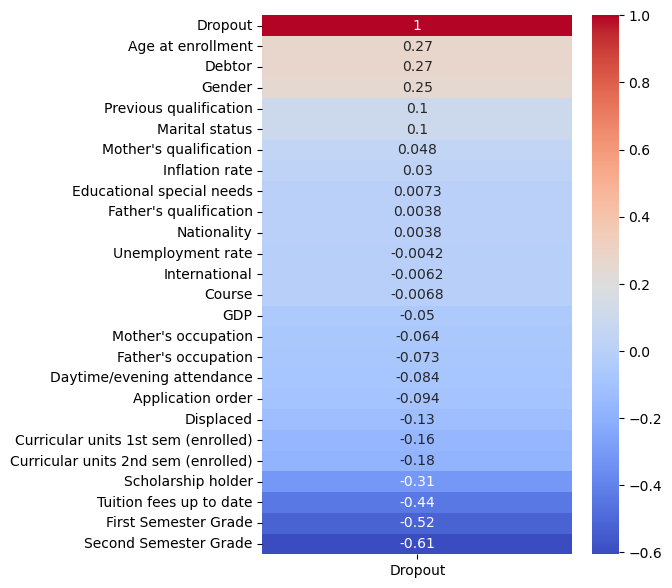

In [163]:
corr_matrix = pd.DataFrame(top_corr)
plt.figure(figsize=(5,7))
sns.heatmap(corr_matrix, annot = True, cmap = 'coolwarm')
plt.show()

<b>Insights: </b> A quick correlation analysis between Dropout and other factors shows Moderate Negative Correlation between Dropout and First (r = -0.52), Second Semester grades (r = -0.61). Low Negative correlation can be seen between Dropout and Tuition Fees up to Date (r = -0.44). A Low Positive Correlation can be seen between Dropout and Age at enrollment (r = 0.27), Debtor (r = 0.27), and Gender (r = 0.25).

In [3]:
print('Total number of students who have graduated or dropped out: ' + str(len(new_student_df['Dropout'])))


NameError: name 'new_student_df' is not defined

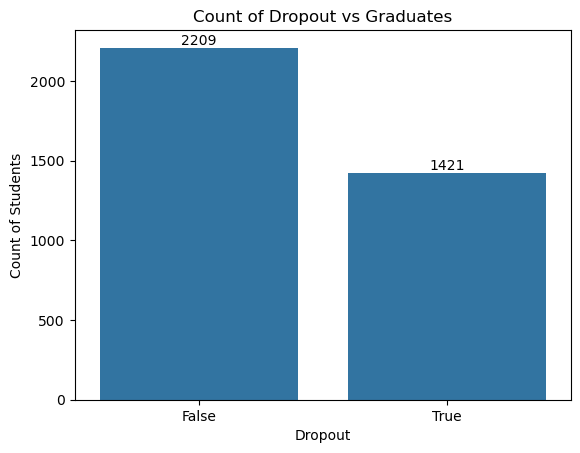

In [18]:
ax1 = sns.countplot(x='Dropout', data = new_student_df)
plt.title('Count of Dropout vs Graduates')
ax1.bar_label(ax1.containers[0])
plt.ylabel('Count of Students')
plt.show()

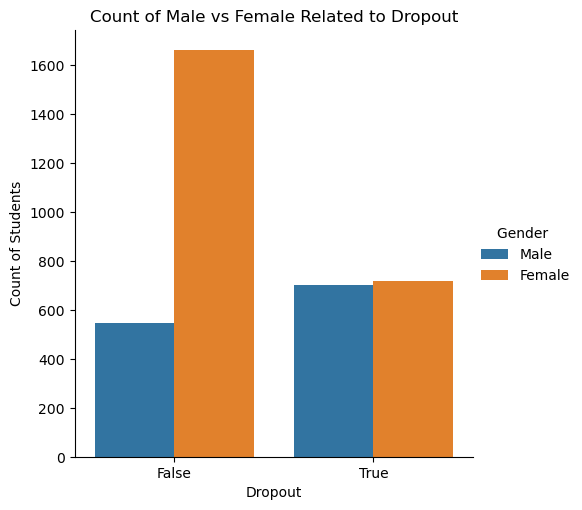

In [20]:
sns.catplot(x= ('Dropout'), hue = 'Gender ', kind = 'count', data = new_student_df)
plt.title('Count of Male vs Female Related to Dropout')
plt.ylabel('Count of Students')
plt.show()

<b>Insights: </b>Despite the low correlation between gender and dropout rate, this chart shows that males have a near equal dropout rate compared to females, though there is a signficantly larger amount of females in the dataset. 

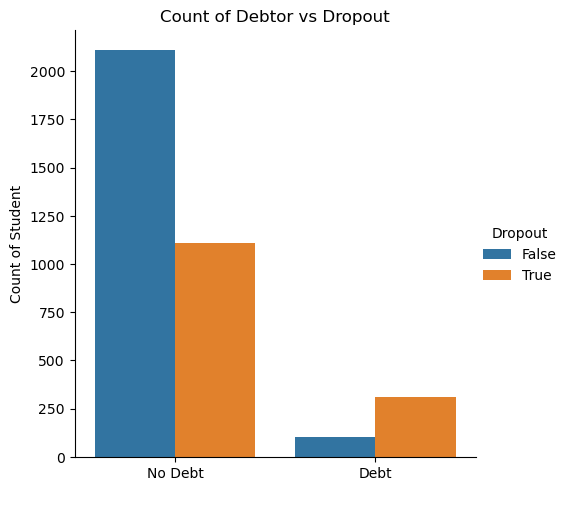

In [28]:
ax3 = sns.catplot(x =  'Debtor', hue = 'Dropout', kind = 'count', data = new_student_df)
ax3.set_xticklabels(['No Debt', 'Debt'])
plt.ylabel('Count of Student')
plt.xlabel(' ')
plt.title('Count of Debtor vs Dropout')
plt.show()

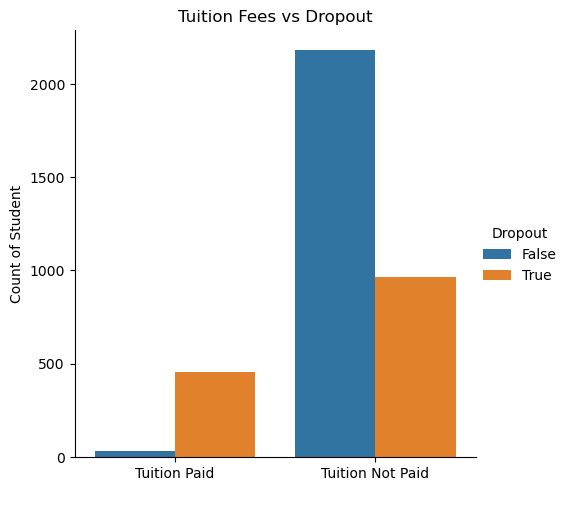

In [83]:
ax3 = sns.catplot(x =  'Tuition fees up to date', hue = 'Dropout', kind = 'count', data = new_student_df)
ax3.set_xticklabels(['Tuition Paid', 'Tuition Not Paid'])
plt.ylabel('Count of Student')
plt.xlabel(' ')
plt.title('Tuition Fees vs Dropout')
plt.show()

<b>Insights</b>: It is evident Debt and Tuition fees play a factor in dropout rate. There is a signficant difference in amount of students who drop out that have debt or have not paid tuition compared to no debt and tuition paid, respectively. This demonstrates financial burden may play a role in dropout rates.

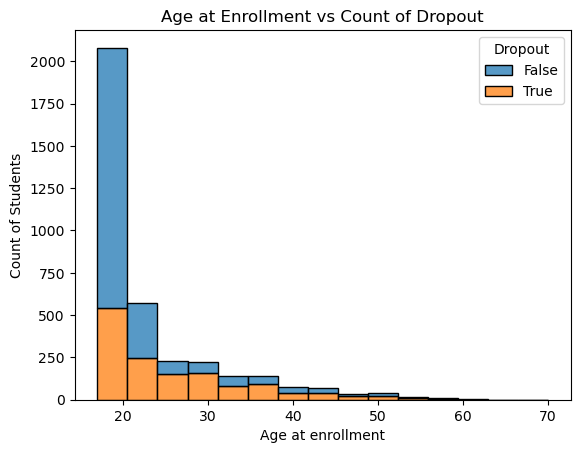

In [94]:
sns.histplot(x = 'Age at enrollment', hue = 'Dropout', multiple = 'stack', bins = 15, data = new_student_df)
plt.title('Age at Enrollment vs Count of Dropout')
plt.ylabel('Count of Students')
plt.show()

<b>Insights</b>: Though a greater amount of individuals dropout from the <20year old group, there are 4x more students in this category than the following. This shows that increased age in enrollment leads to a greater risk of dropout based on the proportions of the bins above. 

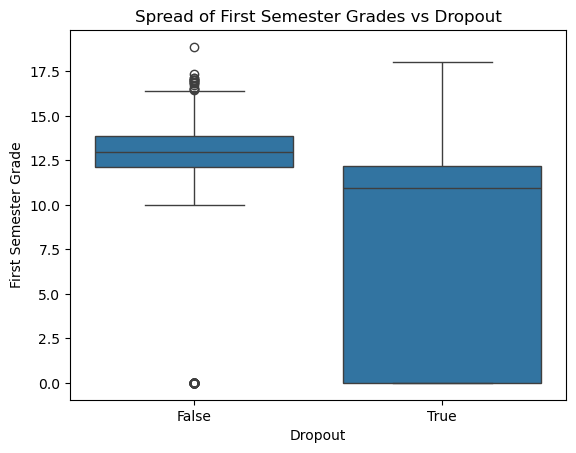

In [29]:
sns.boxplot(x = 'Dropout', y = 'First Semester Grade', data = new_student_df)
plt.title('Spread of First Semester Grades vs Dropout')
plt.show()

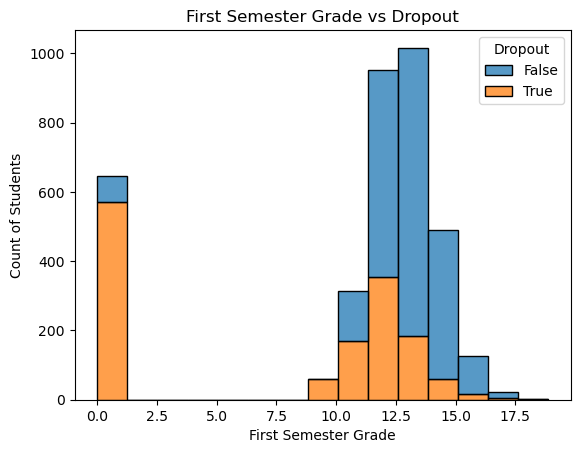

In [51]:
sns.histplot(x = 'First Semester Grade', bins = 15, hue = 'Dropout', multiple = 'stack', data = new_student_df)
plt.title('First Semester Grade vs Dropout')
plt.ylabel('Count of Students')
plt.show()

<b>Insights</b>: This data was originally collected in Portugal where their grading system is on a 0-20 scale. 10 and below is considered failing, while >18 is considered excellent. For individuals who have dropped out, their first semester median is only within 2.07 pts of the graduating group (10.93 vs 13.00), however their 25th percentile is 0, indicating many scores within a failing range. The graduating group has a much more elevated 25th percentile at 12.12pts. This indicates there is much larger percent of individuals failing in the dropout category compared to the graduating. This can further been seen in the below histogram, that the minimum values are not in fact outliers but contain a significant count of students, most that result in dropping out. 

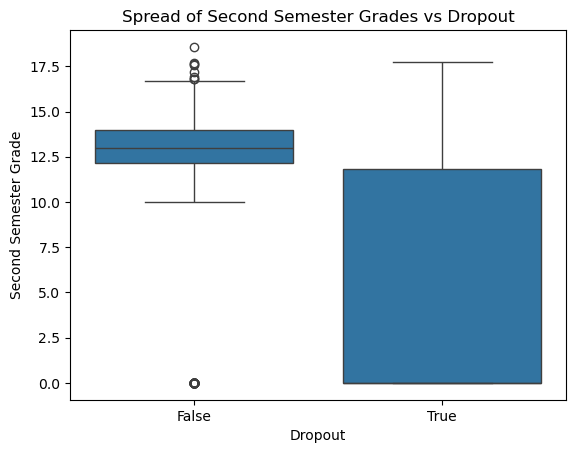

In [38]:
sns.boxplot(x = 'Dropout', y = 'Second Semester Grade', data = new_student_df)
plt.title('Spread of Second Semester Grades vs Dropout')
plt.show()

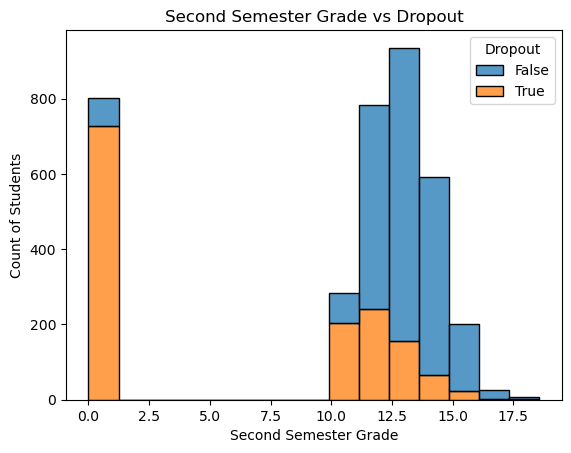

In [53]:
sns.histplot(x = 'Second Semester Grade', bins = 15, hue = 'Dropout', multiple = 'stack', data = new_student_df)
plt.title('Second Semester Grade vs Dropout')
plt.ylabel('Count of Students')
plt.show()

<b>Insights</b>: Second Semester grades show an even greater difference in median (Dropout = 0.0, Graduate = 13.0) and a larger spread of first quartile range. This further supports that lower grades result in higher dropout rates.

<h2> Insights</h2> 

Throughout this analysis it is clear to see there are at least 4 variables at play that are impacting the dropout rate. 
1. First and Second semester grades. Any student with grades <13.0 should be assisted to reduce risk of dropout
2. Age. Any student that took 1+ year off before attending The University (age >20yo) should be assisted to reduce risk of dropout
3. Gender. Males who attend the unversity are at much higher dropout rate compared to females, further investigation may be necessary
4. Tuition/Debt. Financial barriers are seen based on the number of individuals who dropout comapred to those who graduate. Further investigation may be required to see if their is a higher risk group based on the amount of money owed. 

By addressing these above concerns, The University should prove successful in reducing their dropout rate and improve their overall funding. 

Next: Recommend further investigation into the large amount of insufficient, or 0.0, grades in this data set. In addition to investigating how compounding, multivariate factors are further placing students at risk of dropout. 